# FIR filter example from lecture 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
num_pts    = int(1e5);
tstart_sec = 0;
tstop_sec  = 1 - 1/num_pts; # -1/num_pts to make the array size even

In [3]:
# https://stackoverflow.com/questions/33933842/how-to-generate-noise-in-frequency-range-with-numpy
def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real

def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = 1
    return fftnoise(f)

In [4]:
a = band_limited_noise(0, 1e4, samples=num_pts, samplerate=num_pts)
r = a + np.random.normal(0, 0.0004, num_pts)

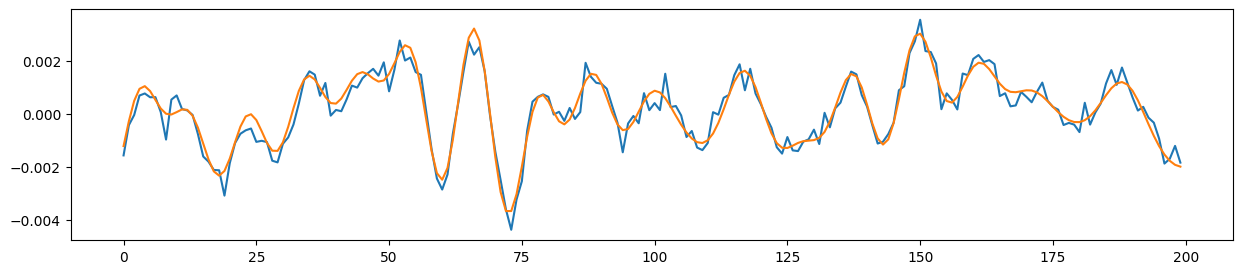

In [5]:
figure(figsize=(15, 3))
plt.plot(r[:200])
plt.plot(a[:200])

In [6]:
sr    = np.fft.fft(r)
rfreq = np.fft.fftfreq(r.shape[-1])
sa    = np.fft.fft(a)
afreq = np.fft.fftfreq(a.shape[-1])

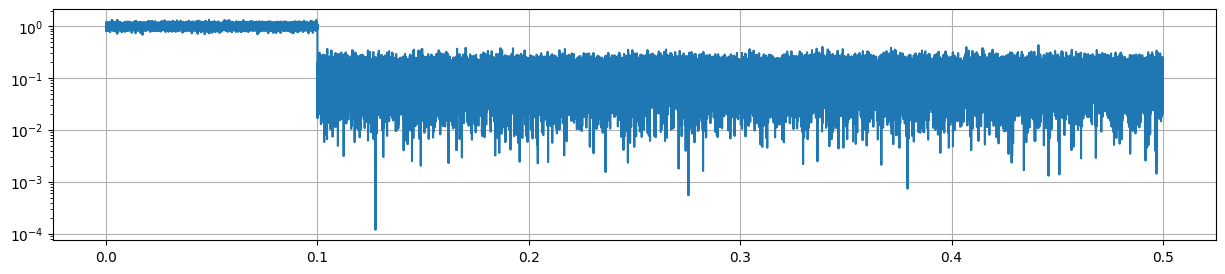

In [7]:
figure(figsize=(15, 3))
plt.semilogy(rfreq[:int(rfreq.shape[0]/2)], np.abs(sr[:int(rfreq.shape[0]/2)]))
plt.grid()

# rectangular window

In [8]:
h = [
    0.135417630349277313,
    0.230386233443460930,
    0.268392272414523625,
    0.230386233443460930,
    0.135417630349277313,
]

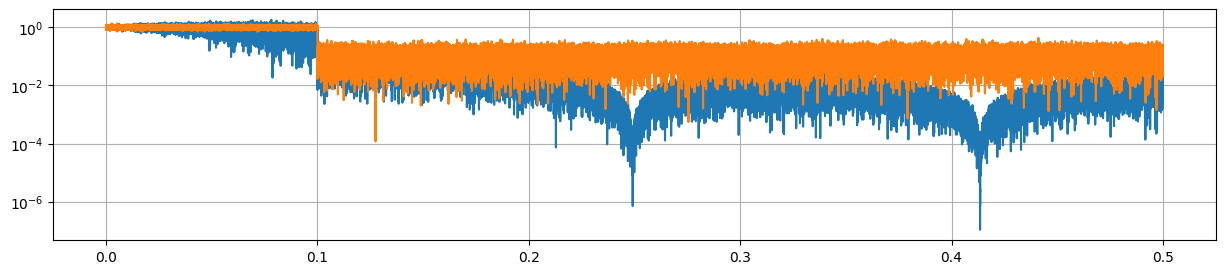

In [9]:
f = np.convolve(r,h)

sf    = np.fft.fft(f)
ffreq = np.fft.fftfreq(f.shape[-1])

figure(figsize=(15, 3))
plt.semilogy(ffreq[:int(ffreq.shape[0]/2)], np.abs(sf[:int(ffreq.shape[0]/2)]))
plt.semilogy(rfreq[:int(rfreq.shape[0]/2)], np.abs(sr[:int(rfreq.shape[0]/2)]))
plt.grid()

# blackman window

In [10]:
h2 = [
    0.026965117675758474,
    0.035661821616319311,
    0.013242546567641776,
    -0.029386957146161446,
    -0.059995293243333477,
    -0.044080435719242091,
    0.030899275324497561,
    0.142647286465277245,
    0.242686059081826194,
    0.282721158754832669,
    0.242686059081826194,
    0.142647286465277245,
    0.030899275324497561,
    -0.044080435719242091,
    -0.059995293243333477,
    -0.029386957146161446,
    0.013242546567641776,
    0.035661821616319311,
    0.026965117675758474,
]

In [ ]:
f2 = np.convolve(r,h2)

sf2    = np.fft.fft(f2)
f2freq = np.fft.fftfreq(f2.shape[-1])

figure(figsize=(15, 3))
plt.semilogy(f2freq[:int(f2freq.shape[0]/2)], np.abs(sf2[:int(f2freq.shape[0]/2)]))
plt.semilogy(ffreq[:int(ffreq.shape[0]/2)], np.abs(sf[:int(ffreq.shape[0]/2)]))
plt.semilogy(rfreq[:int(rfreq.shape[0]/2)], np.abs(sr[:int(rfreq.shape[0]/2)]))
plt.grid()